In [1]:
import pandas as pd 
import numpy as np
file_path = './Bondora_raw.csv'
df = pd.read_csv(file_path, low_memory=False)

In [2]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


#  ActiveLateCategory

In [3]:
# Convert the 'ActiveLateCategory' column to numeric, coercing errors to NaN
df['ActiveLateCategory'] = pd.to_numeric(df['ActiveLateCategory'], errors='coerce')

# Check for any NaN values that couldn't be converted
nan_values = df['ActiveLateCategory'].isna().sum()
print(f"Number of NaN values in 'ActiveLateCategory': {nan_values}")

# You may need to handle NaN values here, depending on your data
# For now, let's fill NaN with 0 or any other appropriate value
# Handle NaN values by filling them with 0 or another appropriate value
df['ActiveLateCategory'] = df['ActiveLateCategory'].fillna(0)
# Define the categorization function again
def categorize_active_late(days):
    if days < 30:
        return '0-30 days'
    elif 30 <= days < 60:
        return '30-60 days'
    elif 60 <= days < 90:
        return '60-90 days'
    else:
        return '90+ days'

# Apply the categorization
df['ActiveLateCategory'] = df['ActiveLateCategory'].apply(categorize_active_late)
nan_values = df['ActiveLateCategory'].isna().sum()

print(f"Number of NaN values in 'ActiveLateCategory': {nan_values}")



Number of NaN values in 'ActiveLateCategory': 134529
Number of NaN values in 'ActiveLateCategory': 0


# ActiveLateLastPaymentCategory  

In [11]:
# Convert the 'ActiveLateLastPaymentCategory' column to numeric, coercing errors to NaN
df['ActiveLateLastPaymentCategory'] = pd.to_numeric(df['ActiveLateLastPaymentCategory'], errors='coerce')

# Handle NaN values by filling them with 0 or another appropriate value
df['ActiveLateLastPaymentCategory'] = df['ActiveLateLastPaymentCategory'].fillna(0)
# Define the categorization function
def categorize_last_payment(days):
    if days < 30:
        return '0-30 days'
    elif 30 <= days < 60:
        return '30-60 days'
    elif 60 <= days < 90:
        return '60-90 days'
    else:
        return '90+ days'

# Apply the categorization
df['ActiveLateLastPaymentCategory'] = df['ActiveLateLastPaymentCategory'].apply(lambda x: categorize_last_payment(x))
# Display the unique categories to verify
print(df['ActiveLateLastPaymentCategory'].unique())


['0-30 days']


# ActiveScheduleFirstPaymentReached

In [4]:
print(df['ActiveScheduleFirstPaymentReached'].unique())
def clean_active_schedule(value):
    # Keep boolean values as they are
    if isinstance(value, bool):
        return value
    
    # Handle numeric values or any non-boolean data
    try:
        numeric_value = float(value)
        # Convert numbers to a boolean, assuming a threshold (e.g., if you want to treat numbers as True/False)
        # Here we assume any non-zero number should be treated as True, adjust as needed.
        return numeric_value != 0
    except ValueError:
        pass  # If it's not a number, continue to the next check
    
    # Handle invalid entries like the string "ActiveScheduleFirstPaymentReached"
    if str(value).strip() == "ActiveScheduleFirstPaymentReached":
        return np.nan  # Replace with NaN or False, depending on your needs
    
    # Return NaN for any unexpected values
    return np.nan



# Apply the cleaning function to the column
df['ActiveScheduleFirstPaymentReached_Cleaned'] = df['ActiveScheduleFirstPaymentReached'].apply(clean_active_schedule)

# Verify the cleaned data
print(df[['ActiveScheduleFirstPaymentReached', 'ActiveScheduleFirstPaymentReached_Cleaned']].tail())


[ True False]
        ActiveScheduleFirstPaymentReached  \
134524                               True   
134525                               True   
134526                               True   
134527                               True   
134528                               True   

        ActiveScheduleFirstPaymentReached_Cleaned  
134524                                       True  
134525                                       True  
134526                                       True  
134527                                       True  
134528                                       True  


In [5]:
# Display unique values in the cleaned column
print(df['ActiveScheduleFirstPaymentReached_Cleaned'].unique())

# Check the last few rows to ensure the cleaning process worked
print(df[['ActiveScheduleFirstPaymentReached', 'ActiveScheduleFirstPaymentReached_Cleaned']].tail())


[ True False]
        ActiveScheduleFirstPaymentReached  \
134524                               True   
134525                               True   
134526                               True   
134527                               True   
134528                               True   

        ActiveScheduleFirstPaymentReached_Cleaned  
134524                                       True  
134525                                       True  
134526                                       True  
134527                                       True  
134528                                       True  


In [6]:
# Check if there are any NaN values after cleaning
nan_values = df['ActiveScheduleFirstPaymentReached_Cleaned'].isna().sum()
print(f"Number of NaN values in the cleaned column: {nan_values}")


Number of NaN values in the cleaned column: 0


# Age 

In [7]:
# Check for minimum, maximum, and unique values
print(df['Age'].describe())
print(df['Age'].unique())


count    134529.000000
mean         40.819295
std          12.348693
min           0.000000
25%          31.000000
50%          40.000000
75%          50.000000
max          77.000000
Name: Age, dtype: float64
[61 48 58 23 25 22 47 38 54 35 31 20 30 57 32 42 27 51 33 34 40 24 26 49
 29 21 43 39 19 55 18 37 46 41 28 50 36 45 76 75 59 44 62 52 63 53 60 68
 66 56 65 67 69 64  0 77 70  1  2 71 72 74]


In [8]:
#Drop rows with missing age values
df.dropna(subset=['Age'], inplace=True)

In [9]:
# Remove unrealistic ages
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]


In [10]:
# Final check for any remaining anomalies
print(df['Age'].describe())


count    134476.000000
mean         40.835324
std          12.324696
min          18.000000
25%          31.000000
50%          40.000000
75%          50.000000
max          77.000000
Name: Age, dtype: float64


In [11]:
# Convert Age to numeric format, if necessary
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [12]:
print(df['Age'].describe())


count    134476.000000
mean         40.835324
std          12.324696
min          18.000000
25%          31.000000
50%          40.000000
75%          50.000000
max          77.000000
Name: Age, dtype: float64


#  Amount

In [13]:
# Check for missing values
missing_amounts = df['Amount'].isnull().sum()
print(f"Missing Amount values: {missing_amounts}")

# Check for minimum, maximum, and unique values
print(df['Amount'].describe())
print(df['Amount'].unique())
df.dropna(subset=['Amount'], inplace=True)
# Convert Amount to numeric format
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
print(df['Amount'].describe())



Missing Amount values: 0
count    134476.000000
mean       2543.940669
std        2169.830350
min           6.390000
25%         744.000000
50%        2125.000000
75%        3600.000000
max       10632.000000
Name: Amount, dtype: float64
[ 115.0408  140.6057  319.5409 ... 6345.     4520.     7730.    ]
count    134476.000000
mean       2543.940669
std        2169.830350
min           6.390000
25%         744.000000
50%        2125.000000
75%        3600.000000
max       10632.000000
Name: Amount, dtype: float64


# AmountOfPreviousLoansBeforeLoan

In [14]:
# Check for missing values
missing_previous_loans = df['AmountOfPreviousLoansBeforeLoan'].isnull().sum()
print(f"Missing values in AmountOfPreviousLoansBeforeLoan: {missing_previous_loans}")

# Check for minimum, maximum, and unique values
print(df['AmountOfPreviousLoansBeforeLoan'].describe())
print(df['AmountOfPreviousLoansBeforeLoan'].unique())
df.dropna(subset=['AmountOfPreviousLoansBeforeLoan'], inplace=True)
# Convert the column to numeric format
df['AmountOfPreviousLoansBeforeLoan'] = pd.to_numeric(df['AmountOfPreviousLoansBeforeLoan'], errors='coerce')
print(df['AmountOfPreviousLoansBeforeLoan'].describe())


Missing values in AmountOfPreviousLoansBeforeLoan: 0
count    134476.000000
mean       2869.336090
std        4507.672311
min           0.000000
25%           0.000000
50%         396.303250
75%        4250.000000
max       53762.000000
Name: AmountOfPreviousLoansBeforeLoan, dtype: float64
[  83.0852  255.6467    0.     ... 4435.8513  990.     1266.94  ]
count    134476.000000
mean       2869.336090
std        4507.672311
min           0.000000
25%           0.000000
50%         396.303250
75%        4250.000000
max       53762.000000
Name: AmountOfPreviousLoansBeforeLoan, dtype: float64


# AppliedAmount

In [15]:
missing_applied_amount = df['AppliedAmount'].isnull().sum()
print(f"Missing values in AppliedAmount: {missing_applied_amount}")
df.dropna(subset=['AppliedAmount'], inplace=True)
df['AppliedAmount'] = pd.to_numeric(df['AppliedAmount'], errors='coerce')


Missing values in AppliedAmount: 0


# BidPrincipal

In [16]:
if 'BidPrincipal' in df.columns:
    df['BidPrincipal'] = df['BidPrincipal'].apply(lambda x: x if x >= 0 else None)

# AuctionBidNumber, AuctionId, AuctionName, AuctionNumber

In [17]:
identifier_columns = ['AuctionBidNumber', 'AuctionId', 'AuctionName', 'AuctionNumber']
for col in identifier_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].apply(lambda x: x if len(x) > 0 else 'Unknown')
        if df[col].duplicated().any():
            print(f"Duplicates found in {col}")

# BidsApi, BidsManual, BidsPortfolioManager

In [18]:
# Define the columns to check
bid_columns = ['BidsApi', 'BidsManual', 'BidsPortfolioManager']

# Convert columns to numeric (if not already), coercing errors to NaN
df[bid_columns] = df[bid_columns].apply(pd.to_numeric, errors='coerce')

# Check for any missing values
missing_values = df[bid_columns].isnull().sum()

# Check for negative or zero values
negative_or_zero_values = df[(df[bid_columns] <= 0).any(axis=1)]

# Output the results
print("Missing values in the bid columns:")
print(missing_values)

print("\nEntries with negative or zero bid values:")
print(negative_or_zero_values)


Missing values in the bid columns:
BidsApi                 0
BidsManual              0
BidsPortfolioManager    0
dtype: int64

Entries with negative or zero bid values:
       ReportAsOfEOD                                LoanId  LoanNumber  \
0         2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1         2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2         2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3         2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4         2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   
...              ...                                   ...         ...   
134524    2020-01-27  A9C9EF0F-4E79-4930-BA8A-A4130077FCC2      283484   
134525    2020-01-27  787345C2-7606-4F72-8FE2-A4170082D77C      285168   
134526    2020-01-27  E2D3384D-289A-4B4D-A2DA-A40F00F7C755      281602   
134527    2020-01-27  7CC7AB74-995B-4467-958A-A41700F78D59      285431   
134528    2020-01

# Data Labeling 

In [19]:
# Perform data labeling to classify the target variable as 'Default' or 'Not Default'

# Create or update the 'Target' column based on the 'DefaultDate' column
df['Target'] = df['DefaultDate'].apply(lambda x: 'Default' if pd.notna(x) else 'Not Default')

# Verify the data labeling by displaying the counts of each category
target_counts = df['Target'].value_counts()

# Output the counts for each category
print(target_counts)

Target
Not Default    91588
Default        42888
Name: count, dtype: int64


#  City, Country, County: Standardize Location Data

In [20]:
def standardize_location(value):
    if isinstance(value, str):
        return value.strip().title()  # Remove leading/trailing spaces and capitalize each word
    return value

df['City'] = df['City'].apply(standardize_location)
df['Country'] = df['Country'].apply(standardize_location)
df['County'] = df['County'].apply(standardize_location)


# Credit Scores: Clean and Categorize

In [21]:
# Mapping for CreditScoreEeMini
ee_mini_mapping = {
    1000: 'No previous payments problems',
    900: 'Payments problems finished 24-36 months ago',
    800: 'Payments problems finished 12-24 months ago',
    700: 'Payments problems finished 6-12 months ago',
    600: 'Payment problems finished < 6 months ago',
    500: 'Active payment problems',
    0: 'Unknown'  # Assuming '0' as unknown or unassigned
}

# Mapping for CreditScoreEsEquifaxRisk
equifax_risk_mapping = {
    'AAA': 'Very low risk',
    'AA': 'Low risk',
    'A': 'Average risk',
    'B': 'Average High risk',
    'C': 'High risk',
    'D': 'Very High risk'
}

# Mapping for CreditScoreEsMicroL
micro_l_mapping = {
    'M1': 'Best score',
    'M2': 'M2',
    'M3': 'M3',
    'M4': 'M4',
    'M5': 'M5',
    'M6': 'M6',
    'M7': 'M7',
    'M8': 'M8',
    'M9': 'M9',
    'M10': 'Worst score'
}

# Mapping for CreditScoreFiAsiakasTietoRiskGrade
fi_as_mapping = {
    'RL1': 'Very low risk',
    'RL2': 'Low risk',
    'RL3': 'Average risk',
    'RL4': 'Big risk',
    'RL5': 'Huge risk',
    '1': 'Very low risk',
    '2': 'Low risk',
    '3': 'Average risk',
    '4': 'Big risk',
    '5': 'Huge risk',
    '6': 'Very high risk',  # Assuming '6' as Very High risk (Not provided)
    '7': 'Very high risk',  # Assuming '7' as Very High risk (Not provided)
    '8': 'Very high risk',  # Assuming '8' as Very High risk (Not provided)
    1.0: 'Very low risk',
    2.0: 'Low risk',
    3.0: 'Average risk',
    4.0: 'Big risk',
    5.0: 'Huge risk',
    6.0: 'Very high risk',
    7.0: 'Very high risk'
}

# Apply mappings
df['CreditScoreEeMini_Cleaned'] = df['CreditScoreEeMini'].map(ee_mini_mapping)
df['CreditScoreEsEquifaxRisk_Cleaned'] = df['CreditScoreEsEquifaxRisk'].map(equifax_risk_mapping)
df['CreditScoreEsMicroL_Cleaned'] = df['CreditScoreEsMicroL'].map(micro_l_mapping)
df['CreditScoreFiAsiakasTietoRiskGrade_Cleaned'] = df['CreditScoreFiAsiakasTietoRiskGrade'].map(fi_as_mapping)

# Handle NaN values - you can adjust the replacement values as needed
df['CreditScoreEeMini_Cleaned'].fillna('Unknown')
df['CreditScoreEsEquifaxRisk_Cleaned'].fillna('Unknown')
df['CreditScoreEsMicroL_Cleaned'].fillna('Unknown')
df['CreditScoreFiAsiakasTietoRiskGrade_Cleaned'].fillna('Unknown')

# Verify the cleaning process by checking the unique values after the transformation
print(df['CreditScoreEeMini_Cleaned'].unique())
print(df['CreditScoreEsEquifaxRisk_Cleaned'].unique())
print(df['CreditScoreEsMicroL_Cleaned'].unique())
print(df['CreditScoreFiAsiakasTietoRiskGrade_Cleaned'].unique())


[nan 'No previous payments problems'
 'Payments problems finished 6-12 months ago'
 'Payments problems finished 12-24 months ago'
 'Payment problems finished < 6 months ago'
 'Payments problems finished 24-36 months ago' 'Active payment problems'
 'Unknown']
[nan 'Average risk' 'Low risk' 'Average High risk' 'High risk'
 'Very low risk' 'Very High risk']
[nan 'M3' 'M5' 'Best score' 'M9' 'M2' 'M6' 'M4' 'M8' 'M7' 'Worst score']
[nan 'Low risk' 'Very low risk' 'Big risk' 'Average risk' 'Huge risk'
 'Very high risk']


#  Date Fields: Validate and Ensure Consistency


In [22]:
def validate_date(date_value):
    try:
        return pd.to_datetime(date_value, format='%Y-%m-%d')
    except (ValueError, TypeError):
        return np.nan  # Handle invalid dates by setting them to NaN

date_columns = ['ContractEndDate', 'DebtOccuredOn', 'DebtOccuredOnForSecondary', 'DefaultDate']
for col in date_columns:
    df[col] = df[col].apply(validate_date)


In [31]:
file_path = './Bondora_raw.csv'
df = pd.read_csv(file_path, low_memory=False)
print(df['EmploymentDurationCurrentEmployer'].unique())


['UpTo3Years' 'MoreThan5Years' 'UpTo4Years' 'UpTo2Years' 'UpTo1Year'
 'Unknown' 'UpTo5Years' 'TrialPeriod' 'Other' 'Retiree']


#  Financial and Employment Data: Ensure Accuracy


In [23]:
# 1. Clean 'DebtToIncome'
# Convert 'DebtToIncome' to numeric, coercing errors to NaN, and fill missing values with zero
df['DebtToIncome'] = pd.to_numeric(df['DebtToIncome'], errors='coerce').fillna(0)

# 2. Preserve 'EmploymentDurationCurrentEmployer' as is
# Fill NaN values with 'Unknown'
df['EmploymentDurationCurrentEmployer'] = df['EmploymentDurationCurrentEmployer'].fillna('Unknown')

# 3. Clean 'EmploymentPosition'
# Remove any leading/trailing whitespace and standardize case
df['EmploymentPosition'] = df['EmploymentPosition'].str.strip().str.lower()

# Handle NaN values by replacing them with 'unknown'
df['EmploymentPosition'] = df['EmploymentPosition'].fillna('unknown')

# 4. Preserve 'EmploymentStatus' as is
# Ensure numeric consistency, treat as numeric if necessary
df['EmploymentStatus'] = pd.to_numeric(df['EmploymentStatus'], errors='coerce')

# 5. Clean 'ExistingLiabilities'
# Convert 'ExistingLiabilities' to integer and fill NaN with 0 (assuming no liabilities)
df['ExistingLiabilities'] = pd.to_numeric(df['ExistingLiabilities'], errors='coerce').fillna(0).astype(int)

# Display the unique values after cleaning to verify changes
print("Unique values in column 'DebtToIncome':")
print(df['DebtToIncome'].unique())
print("--------------------------------------------------")

print("Unique values in column 'EmploymentDurationCurrentEmployer':")
print(df['EmploymentDurationCurrentEmployer'].unique())
print("--------------------------------------------------")

print("Unique values in column 'EmploymentPosition':")
print(df['EmploymentPosition'].unique())
print("--------------------------------------------------")

print("Unique values in column 'EmploymentStatus':")
print(df['EmploymentStatus'].unique())
print("--------------------------------------------------")

print("Unique values in column 'ExistingLiabilities':")
print(df['ExistingLiabilities'].unique())



Unique values in column 'DebtToIncome':
[ 0.   52.06 24.7  ... 42.42  1.77 56.96]
--------------------------------------------------
Unique values in column 'EmploymentDurationCurrentEmployer':
['UpTo3Years' 'MoreThan5Years' 'UpTo4Years' 'UpTo2Years' 'UpTo1Year'
 'Unknown' 'UpTo5Years' 'TrialPeriod' 'Other' 'Retiree']
--------------------------------------------------
Unique values in column 'EmploymentPosition':
['klienditeenindaja' 'õppealajuhataja lasteaias' 'teenindaja' ...
 'elektromonter' 'finančný referent' 'guardia vigilante']
--------------------------------------------------
Unique values in column 'EmploymentStatus':
[ 3. nan  2.  4.  5.  6. -1.  0.]
--------------------------------------------------
Unique values in column 'ExistingLiabilities':
[ 0  6  4  1  8  3  2  5  7  9 10 12 11 15 14 17 13 16 18 24 19 26 23 20
 21 22 25 27 36 30 28 35 29 31 32 33 34 39 40]


# Save the prepocessed data 

In [24]:
# Save the preprocessed data to a CSV file

clean_data =df.to_csv('./Bondora_clean.csv', index=False)
print("saved {clean_data}")



saved {clean_data}


In [25]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Bondora_data preprocessing'

In [26]:
# Load the dataset
data = pd.read_csv('Bondora_clean.csv', low_memory=False)

In [27]:
data.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,ActiveScheduleFirstPaymentReached_Cleaned,Target,CreditScoreEeMini_Cleaned,CreditScoreEsEquifaxRisk_Cleaned,CreditScoreEsMicroL_Cleaned,CreditScoreFiAsiakasTietoRiskGrade_Cleaned
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,NaN,0.0,0.0,NaN,True,Not Default,NaN,NaN,NaN,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,NaN,0.0,0.0,NaN,True,Not Default,NaN,NaN,NaN,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,NaN,0.0,0.0,180+,True,Default,NaN,NaN,NaN,NaN
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,NaN,0.0,0.0,NaN,True,Not Default,NaN,NaN,NaN,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,NaN,0.0,0.0,180+,True,Default,NaN,NaN,NaN,NaN


In [37]:
# Apply the mappings directly to the existing columns without renaming
data['UseOfLoan'] = data['UseOfLoan'].replace({
    -1: 'Unknown', 0: 'Loan_consolidation', 1: 'Real_estate',
    2: 'Home_improvement', 3: 'Business', 4: 'Education',
    5: 'Travel', 6: 'Vehicle', 7: 'Other', 8: 'Health',
    101: 'Working_capital_financing', 102: 'Purchase_of_machinery_equipment',
    104: 'Accounts_receivable_financing', 106: 'Construction_finance',
    107: 'Acquisition_of_stocks', 108: 'Acquisition_of_real_estate',
    110: 'Other_business'
})

data['LanguageCode'] = data['LanguageCode'].replace({
    1: 'Estonian', 2: 'English', 3: 'Russian', 4: 'Finnish',
    5: 'German', 6: 'Spanish', 9: 'Slovakian', 7: 'Others',
    10: 'Others', 13: 'Others', 15: 'Others', 21: 'Others',
    22: 'Others'
})

data['Gender'] = data['Gender'].replace({
    0.0: 'Male', 1.0: 'Female', 2.0: 'Unknown'
})

data['MaritalStatus'] = data['MaritalStatus'].replace({
    1.0: 'Married', 2.0: 'Cohabitant', 3.0: 'Single',
    4.0: 'Divorced', 5.0: 'Widow', -1.0: 'Not_specified',
    0.0: 'Not_specified'
})

data['EmploymentStatus'] = data['EmploymentStatus'].replace({
    1.0: 'Unemployed', 2.0: 'Partially employed', 3.0: 'Fully employed',
    4.0: 'Self-employed', 5.0: 'Entrepreneur', 6.0: 'Retiree',
    -1.0: 'Not_specified', 0.0: 'Not_specified'
})

data['HomeOwnershipType'] = data['HomeOwnershipType'].replace({
    -1.0: 'Not_specified', 0.0: 'Homeless', 1.0: 'Owner',
    2.0: 'Living_with_parents', 3.0: 'Tenant_pre_furnished_property',
    4.0: 'Tenant_unfurnished_property', 5.0: 'Council_house',
    6.0: 'Joint_tenant', 7.0: 'Joint_ownership', 8.0: 'Mortgage',
    9.0: 'Owner_with_encumbrance', 10.0: 'Other'
})

# Optional: Check the transformed columns if needed
print(data['UseOfLoan'].value_counts())
print(data['LanguageCode'].value_counts())
print(data['Gender'].value_counts())
print(data['MaritalStatus'].value_counts())
print(data['EmploymentStatus'].value_counts())
print(data['HomeOwnershipType'].value_counts())


UseOfLoan
Unknown                            97946
Other                               9698
Home_improvement                    9191
Loan_consolidation                  6914
Vehicle                             3150
Business                            1950
Travel                              1787
Health                              1519
Education                           1366
Real_estate                          955
Purchase_of_machinery_equipment       21
Other_business                        17
Accounts_receivable_financing          6
Working_capital_financing              5
Acquisition_of_stocks                  2
Construction_finance                   1
Acquisition_of_real_estate             1
Name: count, dtype: int64
LanguageCode
Estonian     64299
Finnish      32155
Spanish      24103
Russian      12694
English        967
Slovakian      295
Others          11
German           5
Name: count, dtype: int64
Gender
Male       85650
Female     38213
Unknown    10621
Name: count, dtype

In [28]:
data.to_csv('Bondora_raw_transformed.csv', index=False)
transformed_data = pd.read_csv('Bondora_raw_transformed.csv')
print(transformed_data.head())
print(transformed_data['UseOfLoan'].value_counts())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\2442024356.py:2: DtypeWarning: Columns (34,38,80,82,83,89,90,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  transformed_data = pd.read_csv('Bondora_raw_transformed.csv')


  ReportAsOfEOD                                LoanId  LoanNumber  \
0    2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1    2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2    2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3    2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4    2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   

           ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  2009-06-11 16:40:39  2009-06-11 16:40:39                     0        0   
1  2009-06-10 15:48:57  2009-06-10 15:48:57                     0        0   
2  2009-06-05 19:12:29  2009-06-05 19:12:29                     0        0   
3  2009-06-13 12:01:20  2009-06-13 12:01:20                     0        0   
4  2009-06-10 10:17:13  2009-06-10 10:17:13                     0        0   

   BidsManual  UserName  NewCreditCustomer  ... ReScheduledOn  \
0    115.0410      KARU               True  ...    

In [39]:
data_cleaned = transformed_data.drop_duplicates()


In [29]:
missing_values = transformed_data.isnull().sum()
print(missing_values)


ReportAsOfEOD                                      0
LoanId                                             0
LoanNumber                                         0
ListedOnUTC                                        0
BiddingStartedOn                                   0
                                               ...  
Target                                             0
CreditScoreEeMini_Cleaned                      62754
CreditScoreEsEquifaxRisk_Cleaned              122257
CreditScoreEsMicroL_Cleaned                   121960
CreditScoreFiAsiakasTietoRiskGrade_Cleaned    101959
Length: 118, dtype: int64


In [41]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Display the numerical columns
print("Numerical columns (int and float types):")
print(numerical_columns)

Numerical columns (int and float types):
Index(['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType',
       'Age', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'Education', 'OccupationArea',
       'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'PlannedPrincipalTillDate', 'PlannedInterestTillDate',
       'CurrentDebtDaysPrimary', 'CurrentDebtDaysSecondary', 'ExpectedLoss',
       'LossGivenDefault', 'ExpectedReturn', 'ProbabilityOfDefault',
       'PrincipalOverdueBySchedule', 'PlannedPrincipalPostDefault',
       'PlannedInterestPostDefault', 'EAD1', 'EAD2', 'PrincipalRecovery

In [30]:
transformed_data['ContractEndDate'] = transformed_data['ContractEndDate'].fillna(pd.to_datetime('2099-01-01'))
print(transformed_data['ContractEndDate'].unique())
print(transformed_data['ContractEndDate'].isna().sum())

['2010-07-06' '2009-07-07' Timestamp('2099-01-01 00:00:00') ...
 '2021-01-06' '2015-09-05' '2015-06-20']
0


In [31]:
da = transformed_data.dropna(how='all')
for i in transformed_data:
    print(i,transformed_data[i].isnull().sum())


ReportAsOfEOD 0
LoanId 0
LoanNumber 0
ListedOnUTC 0
BiddingStartedOn 0
BidsPortfolioManager 0
BidsApi 0
BidsManual 0
UserName 0
NewCreditCustomer 0
LoanApplicationStartedDate 0
LoanDate 0
ContractEndDate 0
FirstPaymentDate 0
MaturityDate_Original 0
MaturityDate_Last 0
ApplicationSignedHour 0
ApplicationSignedWeekday 0
VerificationType 0
LanguageCode 0
Age 0
DateOfBirth 0
Gender 0
Country 0
AppliedAmount 0
Amount 0
Interest 0
LoanDuration 0
MonthlyPayment 6640
County 36842
City 9794
UseOfLoan 0
Education 0
MaritalStatus 0
NrOfDependants 98876
EmploymentStatus 152
EmploymentDurationCurrentEmployer 0
EmploymentPosition 0
WorkExperience 97954
OccupationArea 41
HomeOwnershipType 1607
IncomeFromPrincipalEmployer 0
IncomeFromPension 0
IncomeFromFamilyAllowance 0
IncomeFromSocialWelfare 0
IncomeFromLeavePay 0
IncomeFromChildSupport 0
IncomeOther 0
IncomeTotal 0
ExistingLiabilities 0
LiabilitiesTotal 0
RefinanceLiabilities 0
DebtToIncome 0
FreeCash 0
MonthlyPaymentDay 0
ActiveScheduleFirstPayme

In [32]:
# removing the columns having more than 40% missing values
missing_values=[]
for i in transformed_data.columns:
    if transformed_data[i].isnull().sum() >= (60*134529)/100:
        missing_values.append(i)
missing_values.remove("DefaultDate")

In [33]:
miss_col=missing_values
df1=transformed_data.drop(miss_col,axis=1)
df1.shape


(134476, 92)

In [34]:
df1.drop(df1[df1['Age']<18].index,inplace=True)


In [35]:
del_col=['ReportAsOfEOD', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
         'ExpectedReturn',
      'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [36]:
df1.drop(df1[df1['Age']<18].index,inplace=True)


In [37]:
df1.shape

(134476, 92)

In [38]:
df1.Status.value_counts()


Status
Current    57135
Late       45772
Repaid     31569
Name: count, dtype: int64

In [51]:
df1=df1[df1.Status!='Current']

In [39]:
df1.Status.value_counts()


Status
Current    57135
Late       45772
Repaid     31569
Name: count, dtype: int64

In [40]:
filtered_data = df1[df1['Status'] != 'Current']

# Step 2: Create the Target variable
# Initialize all as approved (Target = 0)
filtered_data['Target'] = 0

# Step 3: Set Target = 1 for defaulted loans
filtered_data.loc[(filtered_data['Status'] == 'Late') & (filtered_data['DefaultDate'].notnull()), 'Target'] = 1

# Display the DataFrame with the new Target column
print(filtered_data[['Status', 'DefaultDate', 'Target']])



        Status DefaultDate  Target
0       Repaid         NaN       0
1       Repaid         NaN       0
2         Late  2012-07-16       1
3       Repaid         NaN       0
4       Repaid  2009-09-28       0
...        ...         ...     ...
134471  Repaid  2015-05-04       0
134472  Repaid         NaN       0
134473    Late  2015-08-04       1
134474  Repaid  2016-06-17       0
134475    Late  2015-12-30       1

[77341 rows x 3 columns]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\1707457503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Target'] = 0


In [41]:
# Total number of loans
total_loans = len(filtered_data)

# Number of approved loans
approved_loans = len(filtered_data[filtered_data['Target'] == 0])

# Approval rate
approval_rate = (approved_loans / total_loans) * 100
print(f"Approval Rate: {approval_rate:.2f}%")


Approval Rate: 52.02%


In [42]:
import pandas as pd

# Assuming filtered_data is the DataFrame after filtering and creating the Target variable

# Calculate the average loan amount for approved loans (Target = 0)
avg_loan_amount_approved = filtered_data[filtered_data['Target'] == 0]['Amount'].mean()

# Calculate the average loan amount for not approved (defaulted) loans (Target = 1)
avg_loan_amount_not_approved = filtered_data[filtered_data['Target'] == 1]['Amount'].mean()

print(f"Average Loan Amount (Approved): {avg_loan_amount_approved:.2f}")
print(f"Average Loan Amount (Not Approved): {avg_loan_amount_not_approved:.2f}")


Average Loan Amount (Approved): 2311.45
Average Loan Amount (Not Approved): 2647.60


In [43]:
# Group by UseOfLoan and calculate the count of approved (Target = 0) and total loans
approval_rate_by_loan_purpose = (
    filtered_data.groupby('UseOfLoan')
    .apply(lambda x: (x['Target'] == 0).sum() / len(x) * 100)
    .reset_index(name='ApprovalRate')
)

# Display the approval rates by loan purpose
print(approval_rate_by_loan_purpose)

   UseOfLoan  ApprovalRate
0         -1     49.847206
1          0     59.183673
2          1     58.481613
3          2     52.011849
4          3     55.593804
5          4     54.487689
6          5     55.582973
7          6     61.199723
8          7     52.128613
9          8     53.328456


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\759307103.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['Target'] == 0).sum() / len(x) * 100)


count    7.734100e+04
mean     1.870255e+03
std      6.195416e+03
min      0.000000e+00
25%      8.900000e+02
50%      1.300000e+03
75%      2.000000e+03
max      1.012019e+06
Name: IncomeTotal, dtype: float64


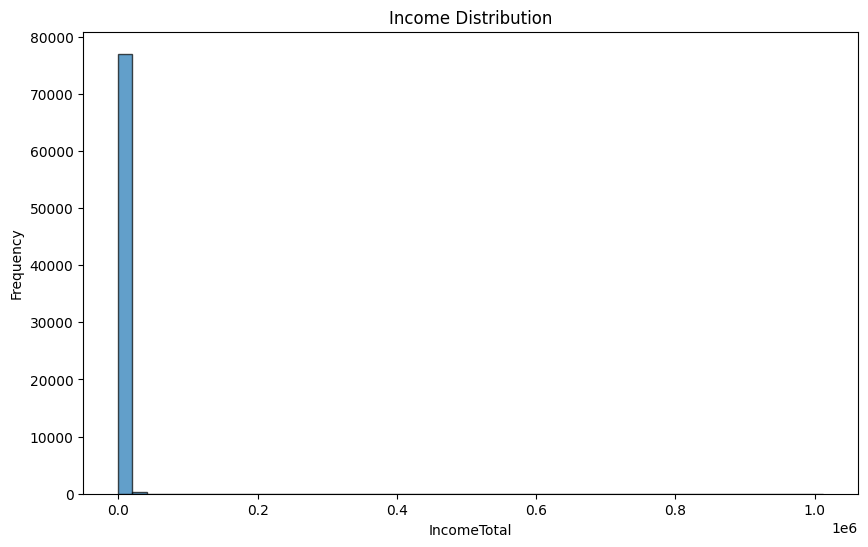

IncomeTotal
0.00          4
1.00          5
1.05          1
1.18          1
1.40          3
             ..
220000.00     1
228550.00     1
235000.00     1
280000.00     1
1012019.00    2
Name: count, Length: 3744, dtype: int64


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming filtered_data is the DataFrame after filtering and creating the Target variable

# Step 1: Describe the IncomeTotal to understand its distribution
income_description = filtered_data['IncomeTotal'].describe()
print(income_description)

# Step 2: Plot the distribution of IncomeTotal
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['IncomeTotal'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Income Distribution')
plt.xlabel('IncomeTotal')
plt.ylabel('Frequency')
plt.show()

# Step 3: Check unique values and their frequencies (optional, if distribution is discrete)
income_value_counts = filtered_data['IncomeTotal'].value_counts().sort_index()
print(income_value_counts)


In [45]:
import pandas as pd

# Create income brackets
income_bins = [0, 1000, 2000, 5000, 10000, float('inf')]
income_labels = ['Low Income', 'Lower-Middle Income', 'Upper-Middle Income', 'High Income', 'Very High Income']

# Add a column to categorize income into brackets
filtered_data['IncomeBracket'] = pd.cut(filtered_data['IncomeTotal'], bins=income_bins, labels=income_labels)

# Calculate approval rate by income bracket
approval_rate_by_income = filtered_data.groupby('IncomeBracket')['Target'].apply(lambda x: (x == 0).mean() * 100)

# Display results
print(approval_rate_by_income)


IncomeBracket
Low Income             56.193570
Lower-Middle Income    49.067746
Upper-Middle Income    46.903533
High Income            75.883953
Very High Income       81.923972
Name: Target, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\4230806883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['IncomeBracket'] = pd.cut(filtered_data['IncomeTotal'], bins=income_bins, labels=income_labels)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\4230806883.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate_by_income = filtered_data.groupby('IncomeBracket')['Target'].apply(lambda x: (x == 0).mean() * 100)


In [46]:
!pip install matplotlib

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\2482434347.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['CreditScoreEeMini_Cleaned'].fillna('Unknown', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\2482434347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['CreditScoreEeMini_Cleaned']

CreditScoreEeMini_Cleaned
No previous payments problems                  61.040516
Payment problems finished < 6 months ago       57.095270
Payments problems finished 6-12 months ago     56.057348
Payments problems finished 12-24 months ago    53.090072
Payments problems finished 24-36 months ago    52.062475
Active payment problems                        48.648649
Unknown                                        46.195728
Name: Target, dtype: float64


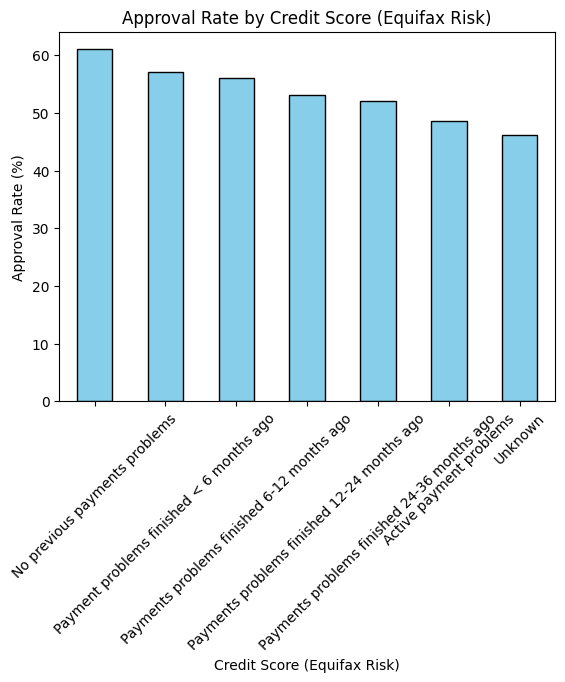

In [47]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming filtered_data already has the 'Target' column defined

# Fill missing CreditScoreEsEquifaxRisk with 'Unknown'
filtered_data['CreditScoreEeMini_Cleaned'].fillna('Unknown', inplace=True)

# Group by the 'CreditScoreEsEquifaxRisk' column to calculate approval rate
approval_rate_by_credit_score = (
    filtered_data.groupby('CreditScoreEeMini_Cleaned')['Target']
    .apply(lambda x: (x == 0).mean() * 100)
    .sort_values(ascending=False)
)

# Display the results
print(approval_rate_by_credit_score)

# Plotting the approval rate by credit score
approval_rate_by_credit_score.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Approval Rate by Credit Score (Equifax Risk)')
plt.xlabel('Credit Score (Equifax Risk)')
plt.ylabel('Approval Rate (%)')
plt.xticks(rotation=45)
plt.show()



In [48]:
print(filtered_data.columns)


Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'ContractEndDate', 'FirstPaymentDate',
       'MaturityDate_Original', 'MaturityDate_Last', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'EmploymentPosition',
       'OccupationArea', 'HomeOwnershipType', 'IncomeFromPrincipalEmployer',
       'IncomeFromPension', 'IncomeFromFamilyAllowance',
       'IncomeFromSocialWelfare', 'IncomeFromLeavePay',
       'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal

In [49]:
# Save the filtered_data DataFrame to a CSV file
filtered_data.to_csv('filtered_data.csv', index=False)


In [51]:
filtered_data['CreditScoreEeMini'] = filtered_data['CreditScoreEeMini'].fillna(-1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\4161013210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['CreditScoreEeMini'] = filtered_data['CreditScoreEeMini'].fillna(-1)


In [64]:
print(filtered_data.columns)


Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'ContractEndDate', 'FirstPaymentDate',
       'MaturityDate_Original', 'MaturityDate_Last', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'EmploymentPosition',
       'OccupationArea', 'HomeOwnershipType', 'IncomeFromPrincipalEmployer',
       'IncomeFromPension', 'IncomeFromFamilyAllowance',
       'IncomeFromSocialWelfare', 'IncomeFromLeavePay',
       'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal

In [52]:
import pandas as pd

# Convert the column to float first
filtered_data['CreditScoreEeMini'] = pd.to_numeric(filtered_data['CreditScoreEeMini'], errors='coerce')

# Now fill the missing values with -1
filtered_data['CreditScoreEeMini'] = filtered_data['CreditScoreEeMini'].fillna(-1)

# Display the first few rows to confirm the changes
filtered_data.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\1525332292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['CreditScoreEeMini'] = pd.to_numeric(filtered_data['CreditScoreEeMini'], errors='coerce')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\1525332292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['CreditScoreEeMini'] = filtered_data['CreditScoreEeMini'].fillna(-1)


,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveScheduleFirstPaymentReached_Cleaned,Target,CreditScoreEeMini_Cleaned,IncomeBracket
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,0.0,0.0,True,0,Unknown,Very High Income
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,0.0,0.0,True,0,Unknown,Very High Income
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,0.0,0.0,True,1,Unknown,High Income
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,0.0,0.0,True,0,Unknown,Very High Income
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,0.0,0.0,True,0,Unknown,High Income


In [53]:
# Check the data type of the column
print(filtered_data['CreditScoreEeMini'].dtype)


float64


In [56]:
filtered_data.to_csv('preprocessed_data.csv', index=False)


In [60]:
high_risk_count =filtered_data[filtered_data['CreditScoreEeMini'] < 600].shape[0]
total_loans_count = filtered_data.shape[0]

print(f"High-risk loan count: {high_risk_count}")
print(f"Total loan count: {total_loans_count}")


High-risk loan count: 43015
Total loan count: 77341


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the preamble is correctly setting up the dataset:
dataset = pd.DataFrame({
    'Amount': pd.to_numeric(Amount, errors='coerce'),
    'CreditScoreEeMini': pd.to_numeric(CreditScoreEeMini, errors='coerce'),
    'DebtToIncome': pd.to_numeric(DebtToIncome, errors='coerce'),
    'EmploymentDurationCurrentEmployer': pd.to_numeric(EmploymentDurationCurrentEmployer, errors='coerce')
})

# Handle missing values (either drop or fill them)
dataset = dataset.dropna()  # or dataset = dataset.fillna(0)

# Create the heatmap
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(dataset.corr(), annot=True, fmt=".1f", ax=ax)
plt.show()


NameError: name 'Amount' is not defined

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the dataset already loaded or assigned
# If these columns come from an existing dataset, you can use the dataset directly
# Replace 'dataset' with the appropriate name if it's already loaded elsewhere

# Example loading from an existing CSV or dataset
# dataset = pd.read_csv('your_dataset.csv')

# If your dataset is already defined:
dataset = pd.DataFrame({
    'Amount': pd.to_numeric(dataset['Amount'], errors='coerce'),
    'CreditScoreEeMini': pd.to_numeric(dataset['CreditScoreEeMini'], errors='coerce'),
    'DebtToIncome': pd.to_numeric(dataset['DebtToIncome'], errors='coerce'),
    'EmploymentDurationCurrentEmployer': pd.to_numeric(dataset['EmploymentDurationCurrentEmployer'], errors='coerce')
})

# Handle missing values by dropping rows with NaN
dataset = dataset.dropna()  # or dataset = dataset.fillna(0)

# Create the heatmap for correlation between the numeric columns
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(dataset.corr(), annot=True, fmt=".1f", ax=ax)
plt.show()


NameError: name 'dataset' is not defined